## Preprocessing Project
### Dataset: Spaceship-titanic
---
## Notebook 2: Deep Neural Networks
---

In this notebook we will check how our preprocessing behaves when it comes to Deep Neural Networks. Let's start from the as in the previous notebook, but this time our benchmark will be `pr.benchmarks.DNNBenchmark`. This algorithm takes many iterations so it may run for a while. But from our expirience it shouldn't run more than 5 minutes.

In [1]:
import pandas as pd
import preprocessing as pr
dataset = pd.read_csv('spaceship-titanic/train.csv')

In [2]:
dnn = pr.benchmarks.DNNBenchmark(hidden_features=50)
score1 = dnn.evaluate(dataset, target='Transported')
tape_graph1 = dnn.tape_graph
print(f'Accuracy before preprocessing: {score1*100:.2f}%')

Accuracy before preprocessing: 80.05%


In [3]:
selector = pr.VARSelector()
extractor = pr.PCAExtractor(num_components=8, target='Transported')
preprocessing = pr.SpaceShipPreprocessing(dataset, target='Transported',
                                 selector=selector, extractor=extractor)
new_dataset = preprocessing.preprocess()

In [4]:
score = dnn.evaluate(new_dataset, target='Transported')
tape_graph2 = dnn.tape_graph
print(f'Accuracy after preprocessing: {score*100:.2f}%')

Accuracy after preprocessing: 98.16%


The accuracy should again go up, now let's show how looked learning process using `pr.vizualization.compare_tape_graphs` function.

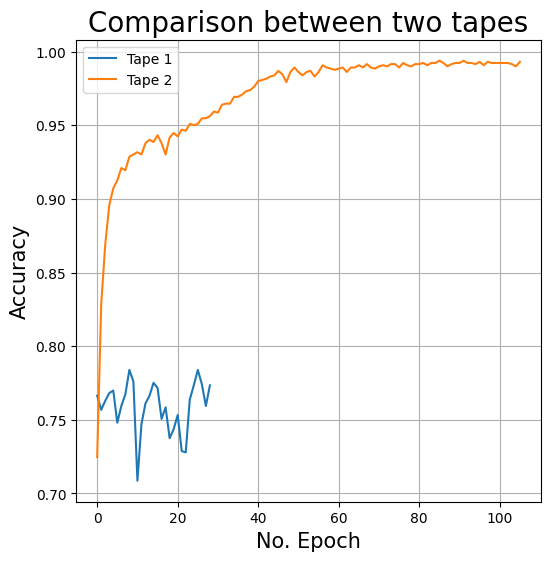

In [5]:
pr.vizualization.compare_tape_graphs(tape_graph1, tape_graph2)

Blue curve representes first tape, while the orange one represents the second one. As you may see the blue one was much noisiser and ended learning much faster, it's because of stopping condition, while not learning for longer time. In the same time orange curve is much smoother which indicates better learning process.